# **Chapitre 2**

In [14]:
%matplotlib inline

import numpy as np
import thinkstats2 as ts
import thinkplot as tp
import nsfg
import first
import math

In [ ]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

**Exercice 2.1**

Est-ce que les premiers bébé arrivent en retard? Une métrique importante pour répondre à cette question est l'*effect size*. Pour quantifier celle-ci, on peut utiliser le coefficient de Cohen.

In [8]:
def CohenEffect(group1, group2):
    diff = group1.mean() - group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [9]:
firsts = live[live.pregordr == 1]
others = live[live.pregordr != 1]

In [10]:
print("La durée moyenne (en semaine) des grossesses d'un premier né :", firsts.prglngth.mean(), "semaines.")
print("La durée moyenne (en semaine) des grossesses des autres :", others.prglngth.mean(), "semaines.")
print("La valeur du coefficient de Cohen est :", CohenEffect(firsts.prglngth, others.prglngth))

La durée moyenne (en semaine) des grossesses d'un premier né : 38.5843230404 semaines.
La durée moyenne (en semaine) des grossesses des autres : 38.5467128028 semaines.
La valeur du coefficient de Cohen est : 0.0139171938336


L'effet est très faible, mais les premier nées tendent à naître légèrement plus tard.

**Exercice 2.2**

L'exercice 2 utilise le fichier de données des répondantes de 2002. Le premier histogramme est celui de la variable totincr. Pour information sur la variables, voir [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [11]:
resp = nsfg.ReadFemResp()

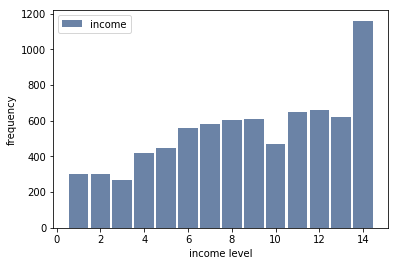

In [15]:
hist = ts.Hist(resp.totincr, label = 'income')
tp.Hist(hist)
tp.Config(xlabel = 'income level', ylabel = 'frequency')

Le deuxième histogramme est celui de la variable age_r.

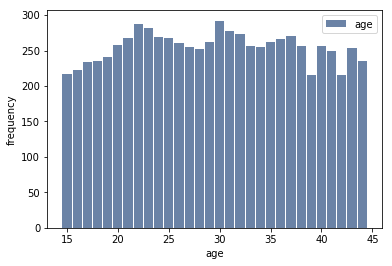

In [17]:
hist = ts.Hist(resp.age_r, label = 'age')
tp.Hist(hist)
tp.Config(xlabel = 'age', ylabel = 'frequency')

Le troisième histogramme est celui de la variable numfmhh, c'est-à-dire le nombre de résidents dans le ménage duquel fait partie la répondante.

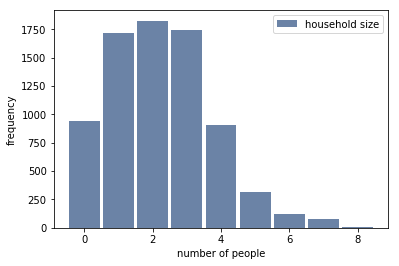

In [19]:
hist = ts.Hist(resp.numfmhh, label = 'household size')
tp.Hist(hist)
tp.Config(xlabel = 'number of people', ylabel = 'frequency')

Le quatrième histogramme est celui de la variable parity, c'est-à-dire le nombre d'enfants portés par la répondantes.

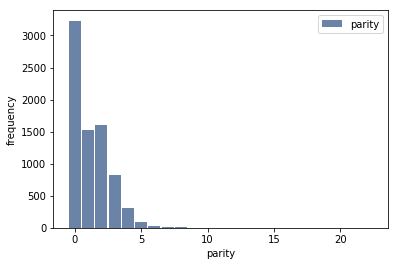

In [21]:
hist = ts.Hist(resp.parity, label = 'parity')
tp.Hist(hist)
tp.Config(xlabel = 'parity', ylabel = 'frequency')

On voit que la variable *parity* à beaucoup de de valeurs extrêmes, comme on voit ici :

In [22]:
hist.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Explorons si les répondantes avec un revenu plus élevé tendent à porter plus d'enfant.

In [25]:
rich = resp[resp.totincr == 14]
notrich = resp[resp.totincr < 14]
rich.parity.mean(), notrich.parity.mean()

(1.0758620689655172, 1.2495758136665125)

In [27]:
CohenEffect(rich.parity, notrich.parity)

-0.12511855314660367

**Exercice 2.3**